In [45]:
!pip install wordcloud

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.linear_model import PassiveAggressiveRegressor

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier

In [48]:
# read data

data = pd.read_csv("Instagram_data.csv", encoding="latin1")

In [49]:
data.head(10)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
5,3884,2046,1214,329,43,74,7,10,144,9,2,Here are some of the most important soft skill...,#data #datascience #dataanalysis #dataanalytic...
6,2621,1543,599,333,25,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,#stockmarket #investing #stocks #trading #mone...
7,3541,2071,628,500,60,135,4,9,124,12,6,Here are some of the best books that you can f...,#python #pythonprogramming #pythonprojects #py...
8,3749,2384,857,248,49,155,6,8,159,36,4,Here are some of the best data analysis projec...,#dataanalytics #datascience #data #machinelear...
9,4115,2609,1104,178,46,122,6,3,191,31,6,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...


In [50]:
data.shape

(119, 13)

In [51]:
# null values check 
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [52]:
data.dropna()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



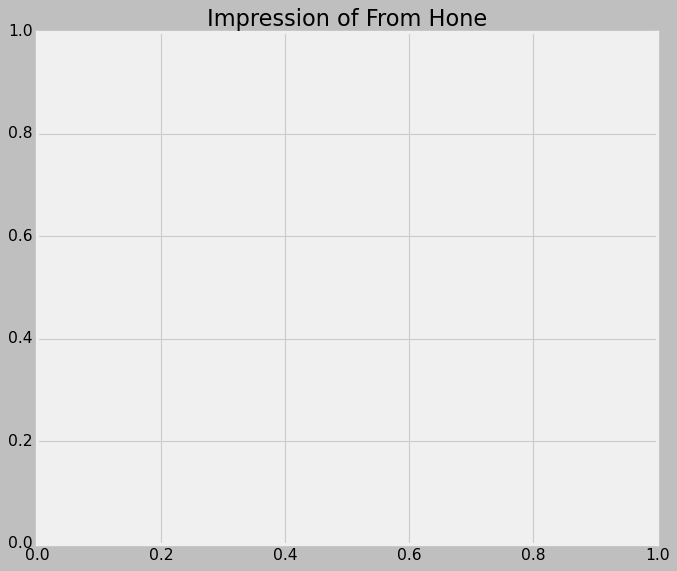

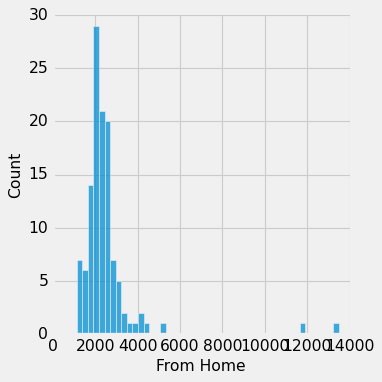

In [54]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Impression of From Hone")
sns.displot(data["From Home"])
plt.show()


C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



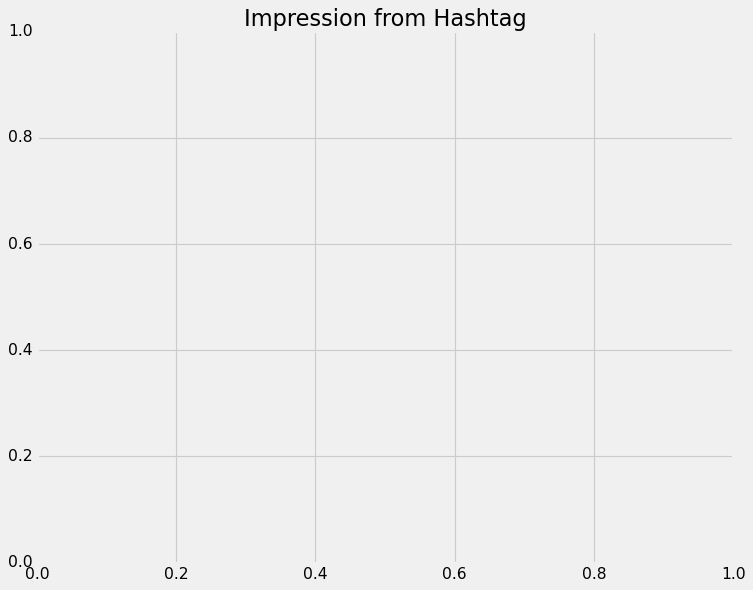

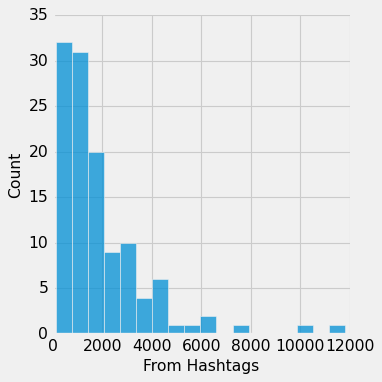

In [55]:
plt.figure(figsize=(10,8))
plt.title("Impression from Hashtag")
sns.displot(data["From Hashtags"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



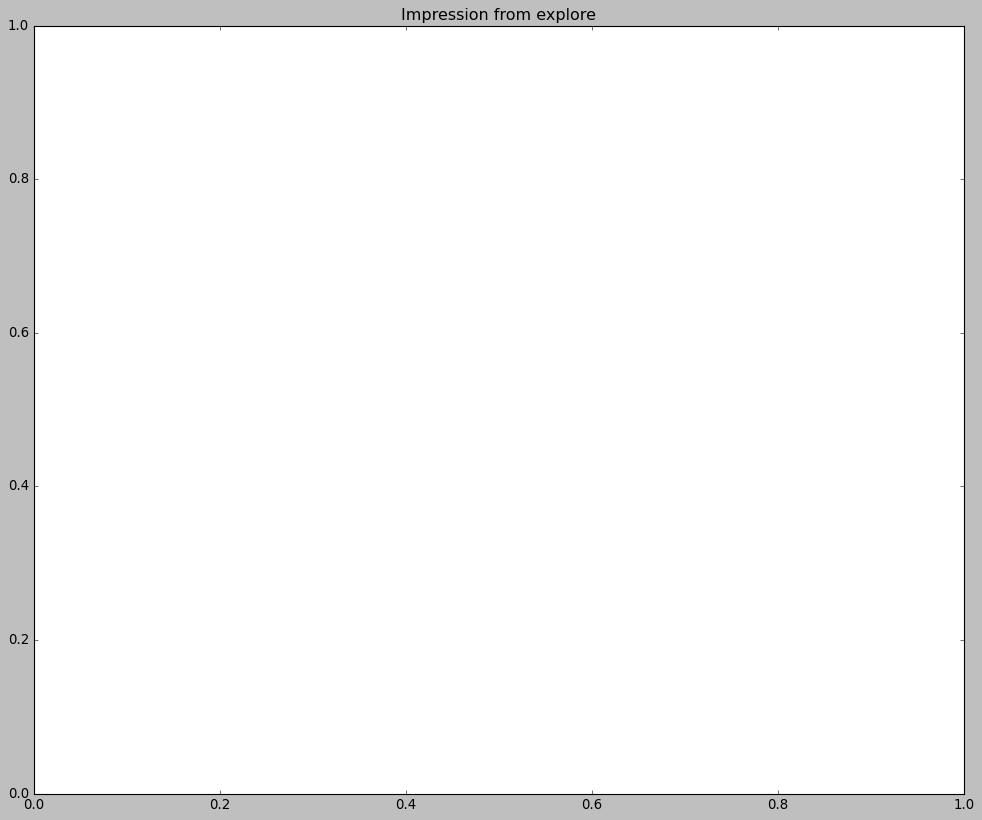

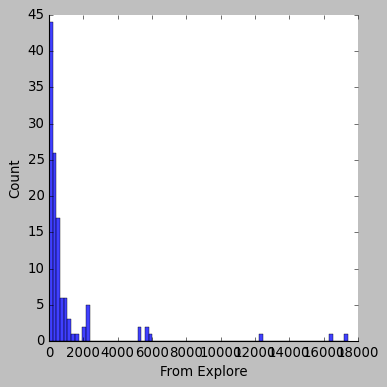

In [80]:
plt.figure(figsize=(15,12))
plt.title("Impression from explore")
sns.displot(data["From Explore"])
plt.show()

In [57]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

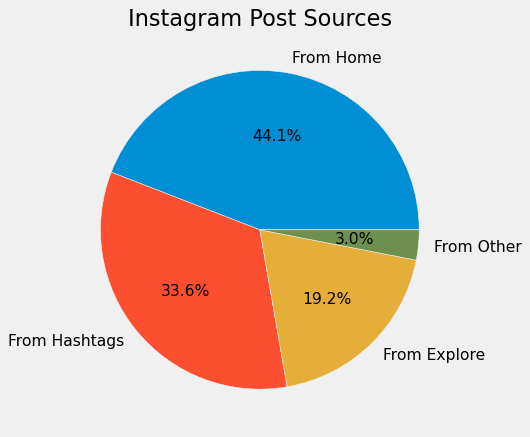

In [58]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ["From Home", "From Hashtags", "From Explore","From Other"]
valu = [home, hashtags, explore, other]

plt.figure(figsize=(10, 6))
plt.pie(valu, labels=labels, autopct='%1.1f%%')
plt.title("Instagram Post Sources")
plt.show()

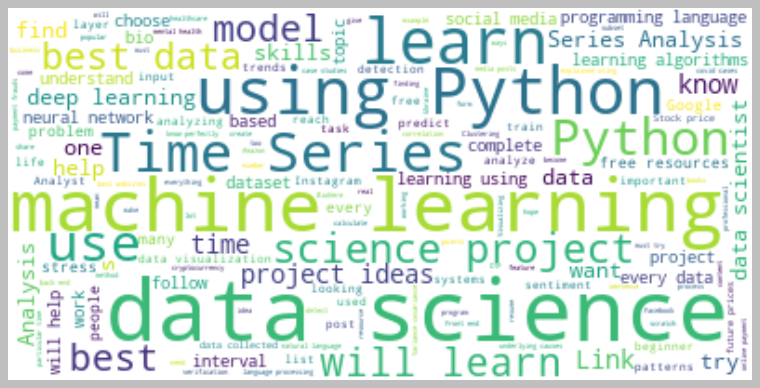

In [59]:
# Check most used value words

text = "".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text) 
plt.style.use("classic")
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

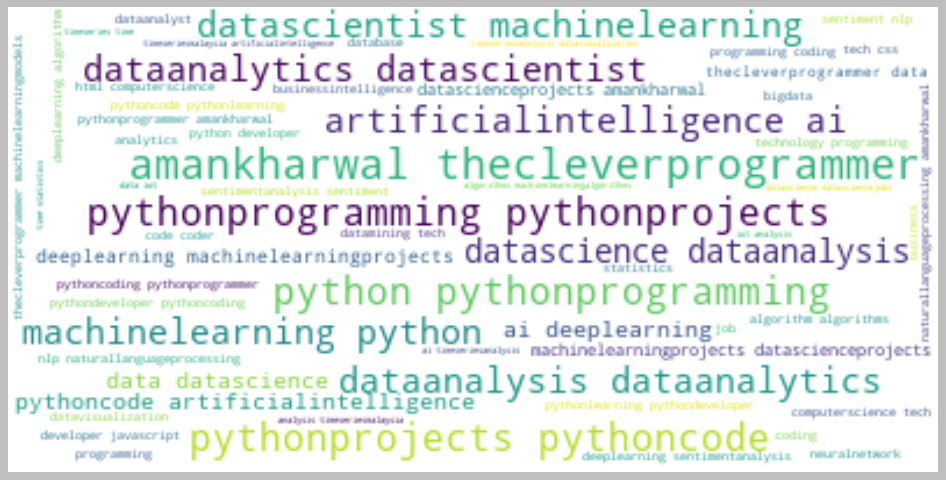

In [60]:
# Most used hashtags

text = "".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [61]:
# Relation between likes and impression

figure = px.scatter(data_frame=data, x="Impressions",y="Likes", size="Likes", trendline="ols", title="Relation between likes and impression")
figure.show()

In [62]:
# relationship between commentd and impressions
figure = px.scatter(data_frame=data, x="Impressions", y="Comments", size="Comments", trendline="ols",title="Relation  between Comments and Impressions ")
figure.show()

In [63]:
# relatation between shares and imporeesions

figure = px.scatter(data_frame =data, x="Impressions", y="Shares", size="Shares", trendline="ols",title="relation of total shares and impressions")
figure.show()

In [64]:
# relation saves and impressions
figure = px.scatter(data_frame=data, x="Impressions", y="Saves", size="Saves", trendline="ols"
                   ,title="Realtion of post saves and impressions")
figure.show()

In [73]:
# check correlation of all columnas with impression
numeric_data = data.select_dtypes(include=[float, int])
correlation = numeric_data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


#### From Explore      0.893607

In [75]:
# Conversion Rate
# (Follows / Profile visits) * 100


In [77]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


#### 41% of conversion rate

In [82]:
# Relationship between total profile visits and number of followers gained from all profile visits

figure = px.scatter(data_frame=data, x="Profile Visits", y="Follows", size="Follows", trendline="ols",
                   title="Relation between profile and followers grow")
figure.show()

In [85]:
# reach of page prediction Model

x=np.array(data[["Likes","Saves","Comments","Shares","Profile Visits","Follows"]])
y=np.array(data["Impressions"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest,ytest)

0.8193168055402938

In [90]:
# features = likes and comments , shares, profile visits, follows
features = np.array([[282.0,233.0,4.0,9.0,165.0,54.0]])

In [92]:
model.predict(features)

array([9726.8104594])